In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../data/final_dataset.xlsx')

# Transfermarkt Data Visualization

### Number of football players by each position

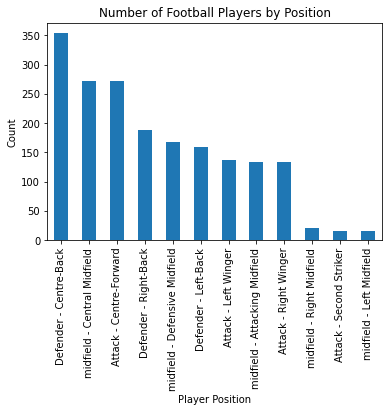

In [3]:
position_counts = df['Position'].value_counts()
position_counts.plot(kind='bar')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Number of Football Players by Position')
plt.show()

In [5]:
def getAttackers():
    positionToFilter = ['Attack - Centre-Forward', 'Attack - Left Winger', 'Attack - Right Winger', 'Attack - Second Striker']
    filtered_df = df[df['Position'].isin(positionToFilter)]
    return filtered_df

def getMidfielders():
    positionToFilter = ['midfield - Central Midfield', 'midfield - Defensive Midfield', 'midfield - Attacking Midfield', 'midfield - Right Midfield', 'midfield - Left Midfield']
    filtered_df = df[df['Position'].isin(positionToFilter)]
    return filtered_df

def getDefenders():
    positionToFilter = ['Defender - Centre-Back', 'Defender - Left-Back', 'Defender - Right-Back']
    filtered_df = df[df['Position'].isin(positionToFilter)]
    return filtered_df

In [6]:
attackers = getAttackers()
midfielders = getMidfielders()
defenders = getDefenders()

### Number of football players by grouped position

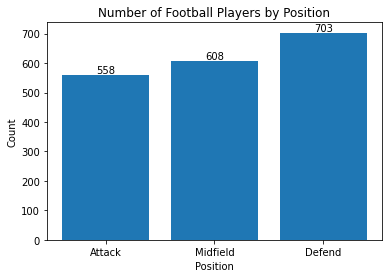

In [7]:
lengths = [len(attackers), len(midfielders), len(defenders)]
labels = ['Attack', 'Midfield', 'Defend']
plt.bar(labels, lengths)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Number of Football Players by Position')
for i in range(len(lengths)):
    plt.text(i, lengths[i], str(lengths[i]), ha='center', va='bottom')
plt.show()

### Average Player Transfer Value by Position

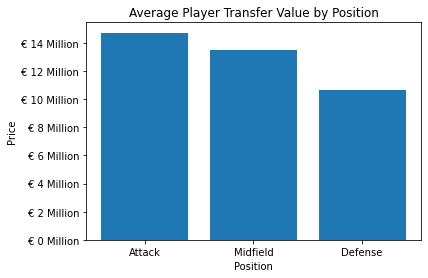

In [8]:
from matplotlib import ticker

average_transfer_value = {
    'Attack': attackers['Current value in euro'].mean() / 1e6,
    'Midfield': midfielders['Current value in euro'].mean() / 1e6,
    'Defense': defenders['Current value in euro'].mean() / 1e6
}

plt.bar(average_transfer_value.keys(), average_transfer_value.values())
plt.xlabel('Position')
plt.ylabel('Price')
plt.title('Average Player Transfer Value by Position')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Top 20 Most Valuable Football Players

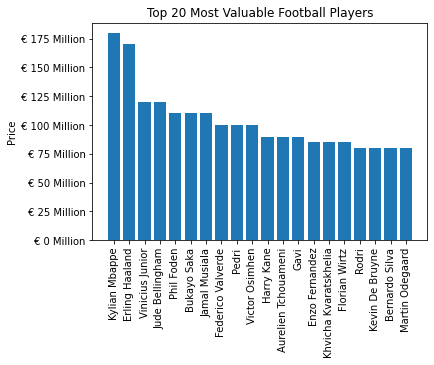

In [10]:
top_players = df.nlargest(20, 'Current value in euro')
top_players['Current value in million euro'] = top_players['Current value in euro'] / 1e6
plt.bar(top_players['Player'], top_players['Current value in million euro'])
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 20 Most Valuable Football Players')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Top 10 Average Player Transfer Values by Club

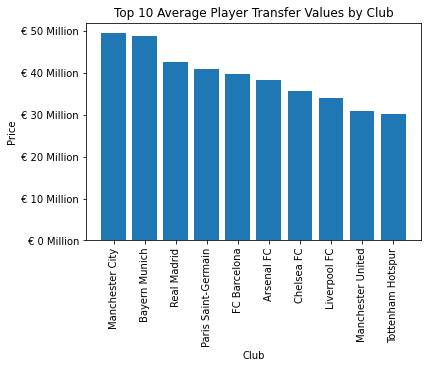

In [44]:
average_transfer_values = df.groupby('Club')['Current value in euro'].mean()

top_10_clubs = average_transfer_values.sort_values(ascending=False).head(10)

plt.bar(top_10_clubs.index, top_10_clubs.values / 1e6)

plt.xlabel('Club')
plt.ylabel('Price')
plt.title('Top 10 Average Player Transfer Values by Club')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)

plt.show()

### Top 10 Nationalities by Player Count

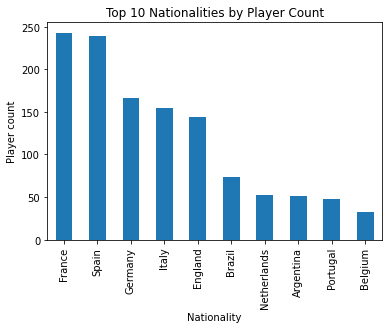

In [4]:
nationality_counts = df['Nationality'].value_counts().head(10)
nationality_counts.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Player count')
plt.title('Top 10 Nationalities by Player Count')
plt.show()

### Top 10 Most Valuable Attackers

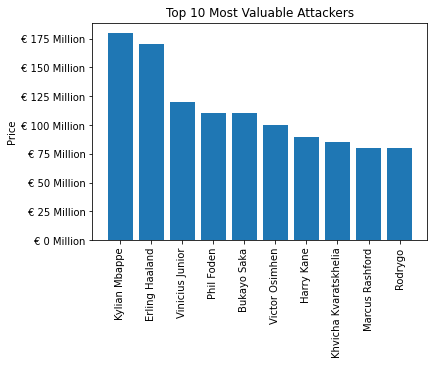

In [13]:
top_players = attackers.nlargest(10, 'Current value in euro')
top_players['Current value in million euro'] = top_players['Current value in euro'] / 1e6
plt.bar(top_players['Player'], top_players['Current value in million euro'])
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 10 Most Valuable Attackers')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Top 10 Most Valuable Midfielders

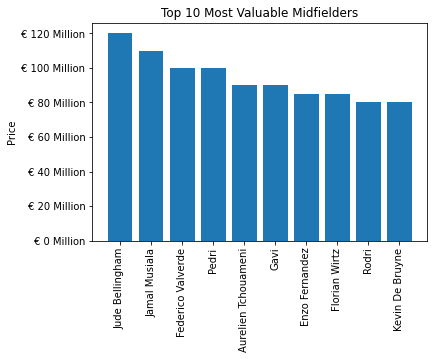

In [14]:
top_players = midfielders.nlargest(10, 'Current value in euro')
top_players['Current value in million euro'] = top_players['Current value in euro'] / 1e6
plt.bar(top_players['Player'], top_players['Current value in million euro'])
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 10 Most Valuable Midfielders')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Top 10 Most Valuable Defenders

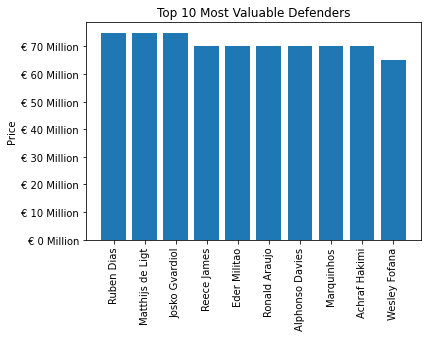

In [19]:
top_players = defenders.nlargest(10, 'Current value in euro')
top_players['Current value in million euro'] = top_players['Current value in euro'] / 1e6
plt.bar(top_players['Player'], top_players['Current value in million euro'])
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 10 Most Valuable Defenders')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Player Height Distribution

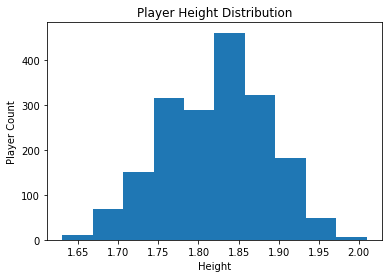

In [23]:
plt.hist(df['Height'], bins=10)

plt.xlabel('Height')
plt.ylabel('Player Count')
plt.title('Player Height Distribution')

plt.show()

### Height vs. Transfer Value

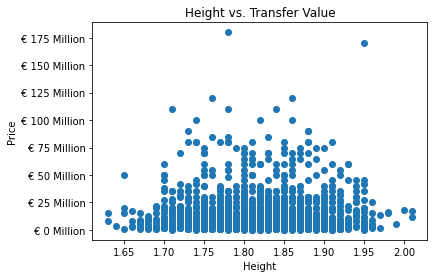

In [19]:
df['Current value in million euro'] = df['Current value in euro'] / 1e6
plt.scatter(df['Height'], df['Current value in million euro'])
plt.xlabel('Height')
plt.ylabel('Price')
plt.title('Height vs. Transfer Value')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Player Foot Distribution

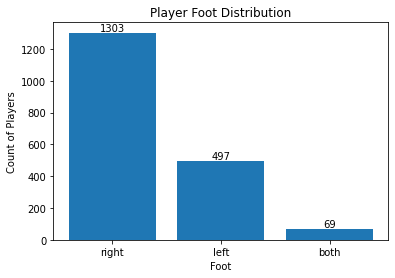

In [9]:
foot_counts = df['Foot'].value_counts()
plt.bar(foot_counts.index, foot_counts.values)
plt.xlabel('Foot')
plt.ylabel('Count of Players')
plt.title('Player Foot Distribution')
for i, count in enumerate(foot_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

### Average Transfer Value by Foot

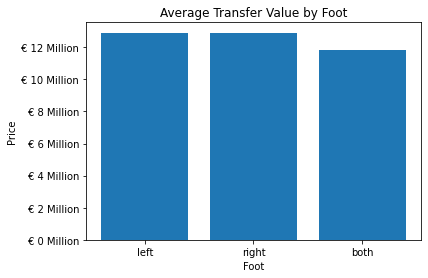

In [42]:
left_foot_df = df[df['Foot'] == 'left']
right_foot_df = df[df['Foot'] == 'right']
both_foot_df = df[df['Foot'] == 'both']

left_foot_avg_value = left_foot_df['Current value in euro'].mean() / 1e6
right_foot_avg_value = right_foot_df['Current value in euro'].mean() / 1e6
both_foot_avg_value = both_foot_df['Current value in euro'].mean() / 1e6

plt.bar(['left', 'right', 'both'], [left_foot_avg_value, right_foot_avg_value, both_foot_avg_value])

plt.xlabel('Foot')
plt.ylabel('Price')
plt.title('Average Transfer Value by Foot')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Height vs. Contract Expire Date

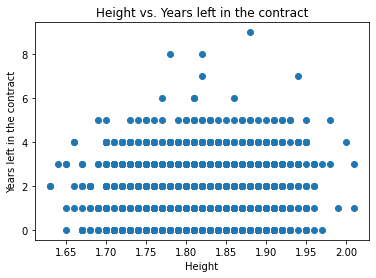

In [21]:
plt.scatter(df['Height'], df['Contract expire date'])

plt.xlabel('Height')
plt.ylabel('Years left in the contract')
plt.title('Height vs. Years left in the contract')

plt.show()

### Age vs. Contract Expire Date

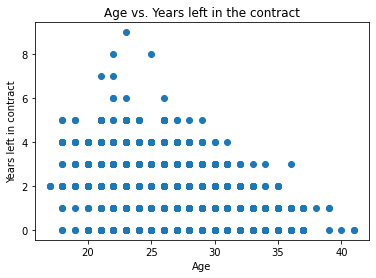

In [23]:

plt.scatter(df['Age'], df['Contract expire date'])

plt.xlabel('Age')
plt.ylabel('Years left in contract')
plt.title('Age vs. Years left in the contract')

plt.show()

### Age vs. Average Transfer Value

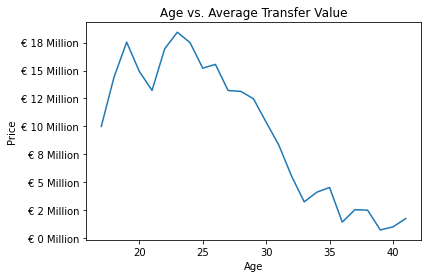

In [38]:
average_transfer_value = df.groupby('Age')['Current value in euro'].mean() / 1e6

plt.plot(average_transfer_value.index, average_transfer_value)

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs. Average Transfer Value')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Contract Expire Date vs. Average Transfer Value

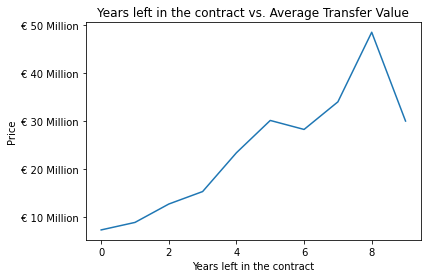

In [22]:
average_transfer_value = df.groupby('Contract expire date')['Current value in euro'].mean() / 1e6

plt.plot(average_transfer_value.index, average_transfer_value)

plt.xlabel('Years left in the contract')
plt.ylabel('Price')
plt.title('Years left in the contract vs. Average Transfer Value')
formatter = ticker.FormatStrFormatter('€ %.0f Million')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# FBREF Data Visualization

### Top Predictors for Attackers

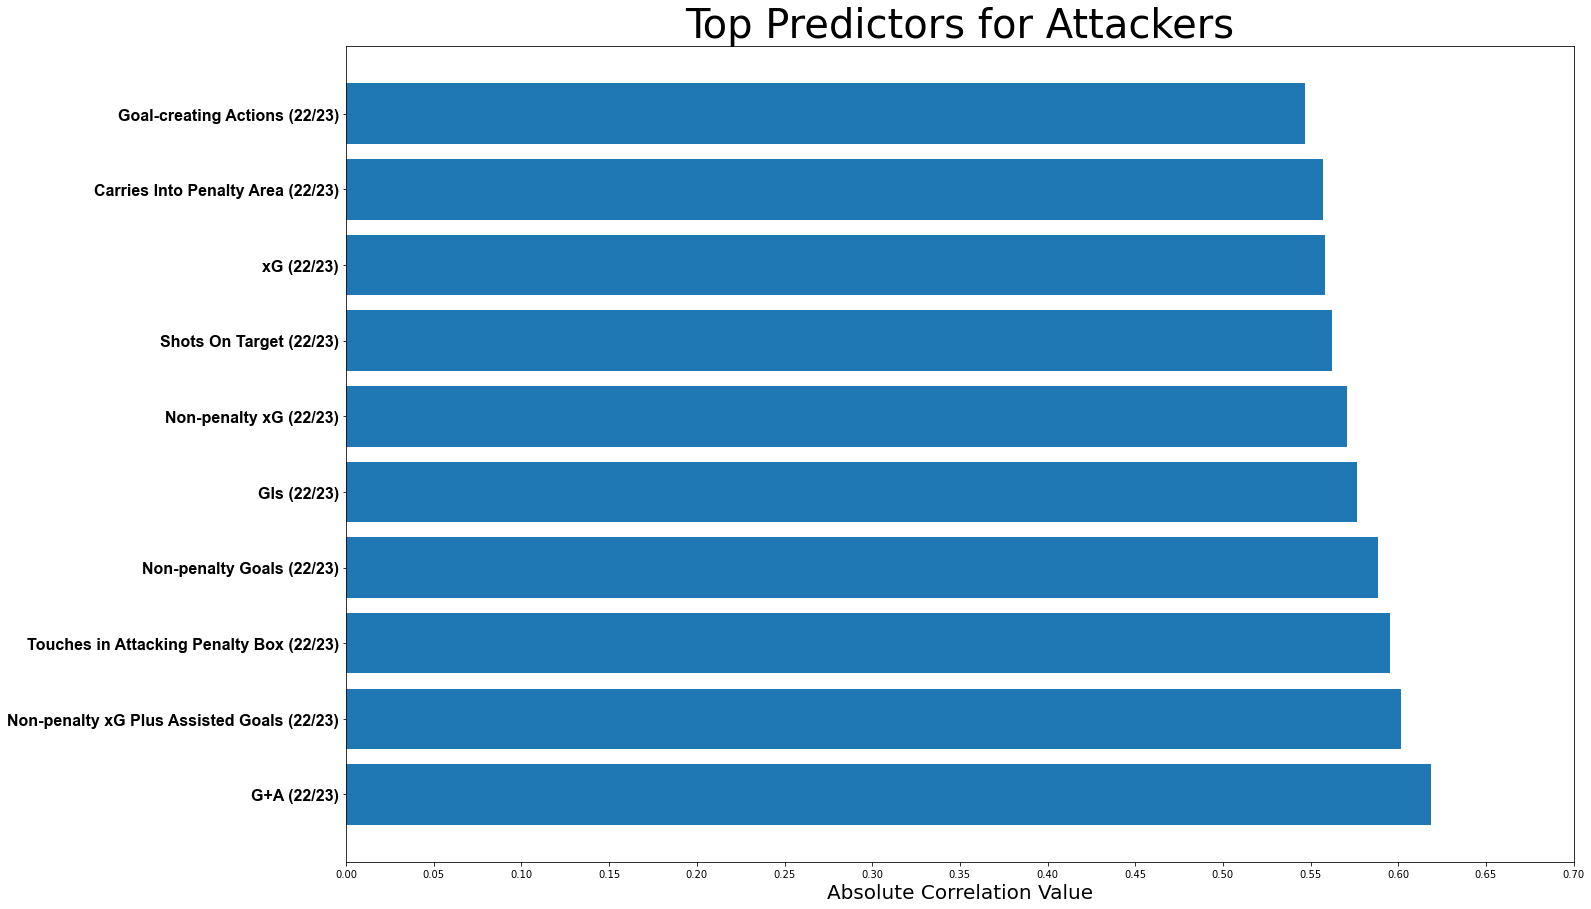

In [14]:
fig, ax = plt.subplots(figsize=(22, 15))

predictor_columns = attackers.columns[9:122]  
target_variable = 'Current value in euro'

correlations = attackers[predictor_columns].corrwith(attackers[target_variable])
abs_correlations = np.abs(correlations)

top_10_predictors_attackers = abs_correlations.sort_values(ascending=False).head(10)

y_labels = list(top_10_predictors_attackers.index)
y_ticks = list(range(0, len(y_labels)))
x_values = list(top_10_predictors_attackers.values)
x_ticks = [a / 100 for a in range(0, int(max(x_values) * 100) + 10, 5)]

ax.barh(y_ticks, x_values)
font_properties = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontdict=font_properties)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value', fontsize=20)
ax.set_title('Top Predictors for Attackers', fontsize=40)

plt.show()

### Top Predictors for Midfielders

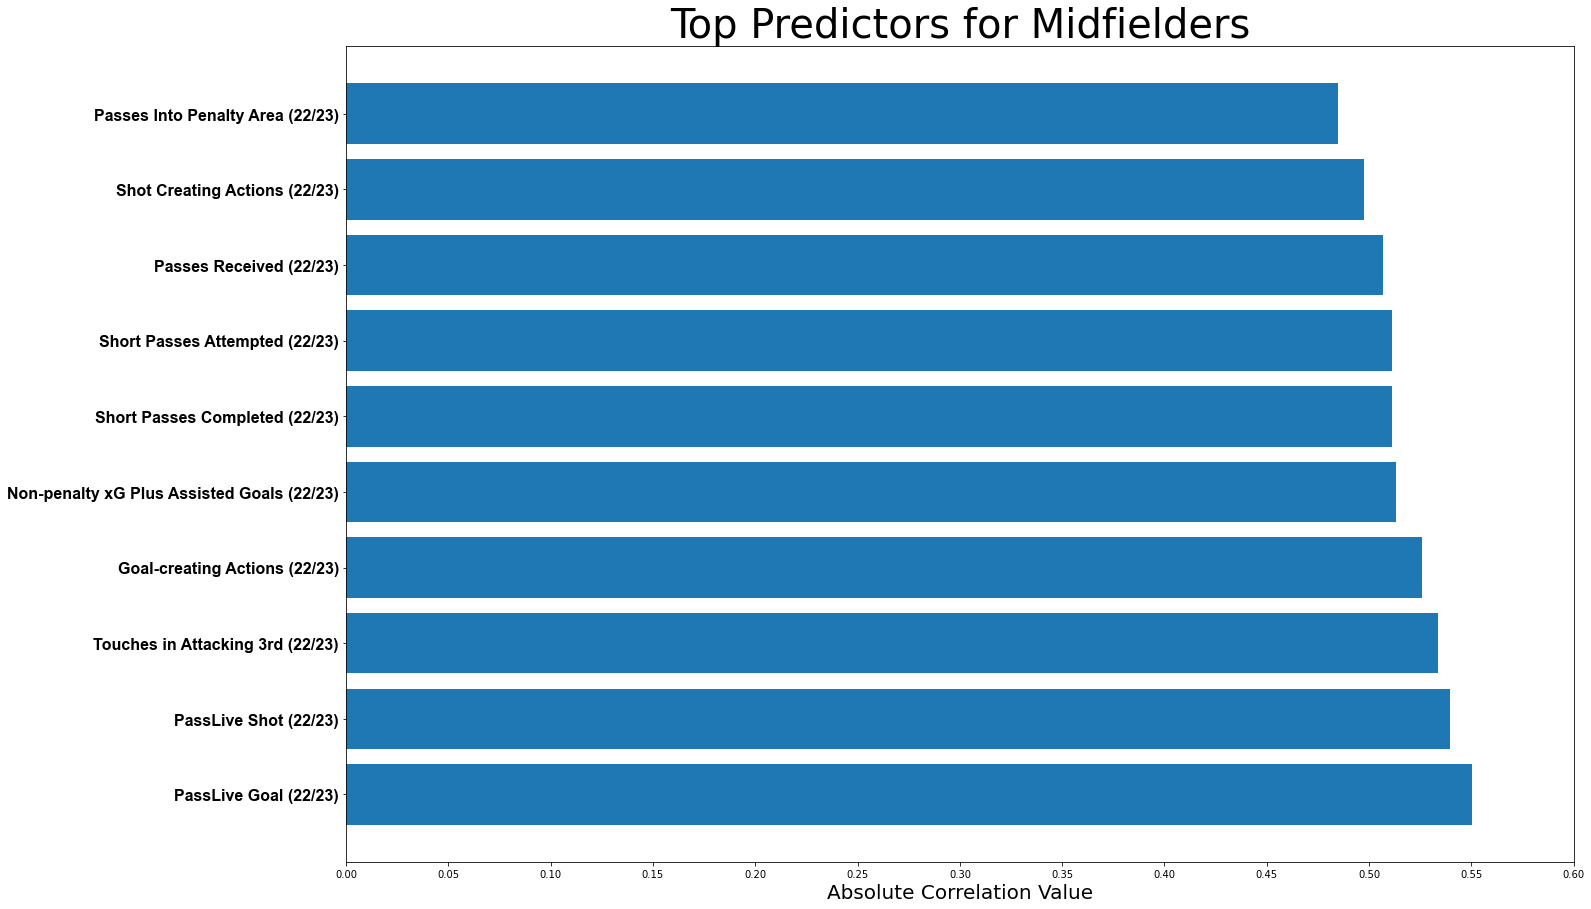

In [15]:
fig, ax = plt.subplots(figsize=(22, 15))

predictor_columns = midfielders.columns[9:122]  
target_variable = 'Current value in euro'

correlations = midfielders[predictor_columns].corrwith(midfielders[target_variable])
abs_correlations = np.abs(correlations)

top_10_predictors_midfielders = abs_correlations.sort_values(ascending=False).head(10)

y_labels = list(top_10_predictors_midfielders.index)
y_ticks = list(range(0, len(y_labels)))
x_values = list(top_10_predictors_midfielders.values)
x_ticks = [a / 100 for a in range(0, int(max(x_values) * 100) + 10, 5)]

ax.barh(y_ticks, x_values)
font_properties = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontdict=font_properties)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value', fontsize=20)
ax.set_title('Top Predictors for Midfielders', fontsize=40)

plt.show()

### Top Predictors for Defenders

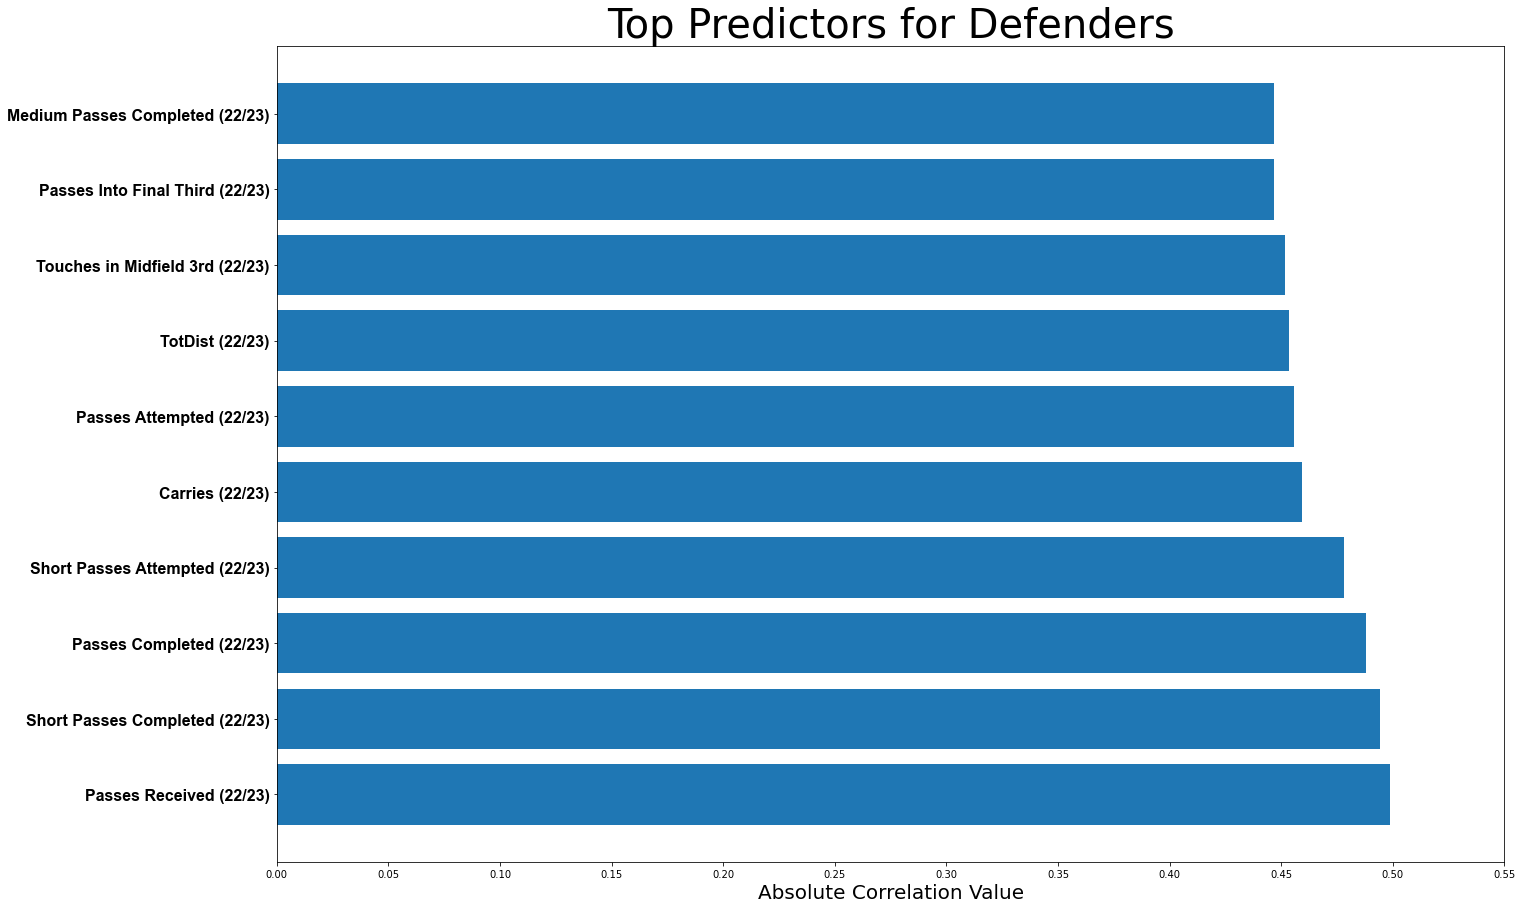

In [16]:
fig, ax = plt.subplots(figsize=(22, 15))

predictor_columns = defenders.columns[9:122]  
target_variable = 'Current value in euro'

correlations = defenders[predictor_columns].corrwith(defenders[target_variable])
abs_correlations = np.abs(correlations)

top_10_predictors_defenders = abs_correlations.sort_values(ascending=False).head(10)

y_labels = list(top_10_predictors_defenders.index)
y_ticks = list(range(0, len(y_labels)))
x_values = list(top_10_predictors_defenders.values)
x_ticks = [a / 100 for a in range(0, int(max(x_values) * 100) + 10, 5)]

ax.barh(y_ticks, x_values)
font_properties = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontdict=font_properties)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value', fontsize=20)
ax.set_title('Top Predictors for Defenders', fontsize=40)

plt.show()

### Player Count by top predictors

In [80]:
def plot_predictors(top_10_predictors, name):
    fig, axs = plt.subplots(5, 2, figsize=(12, 18))
    fig.tight_layout(pad=5)

    for i, predictor in enumerate(top_10_predictors):
        ax = axs[i // 2, i % 2]

        predictor_counts = attackers[predictor].value_counts()

        ax.bar(predictor_counts.index, predictor_counts.values)

        ax.set_xlabel(predictor)
        ax.set_ylabel('Player Count')
        ax.set_title(f'{name} Count by {predictor}')

    plt.show()

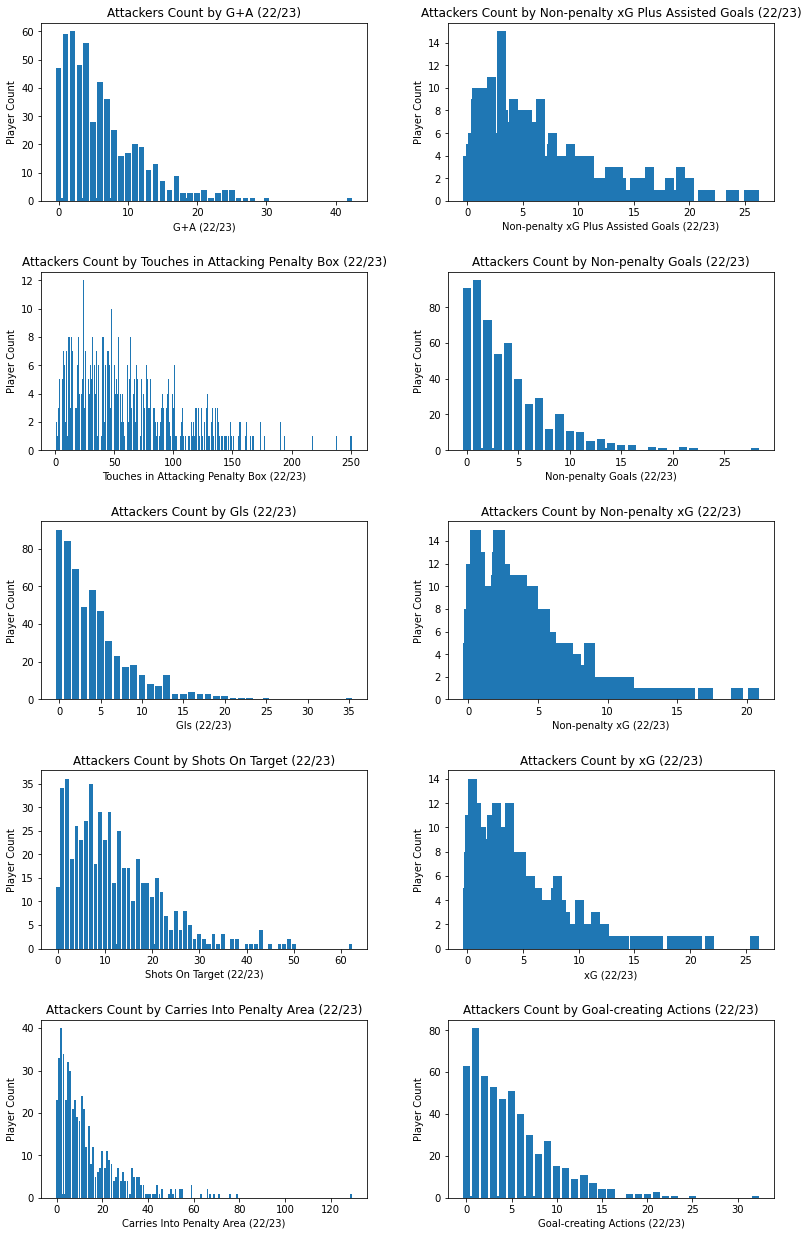

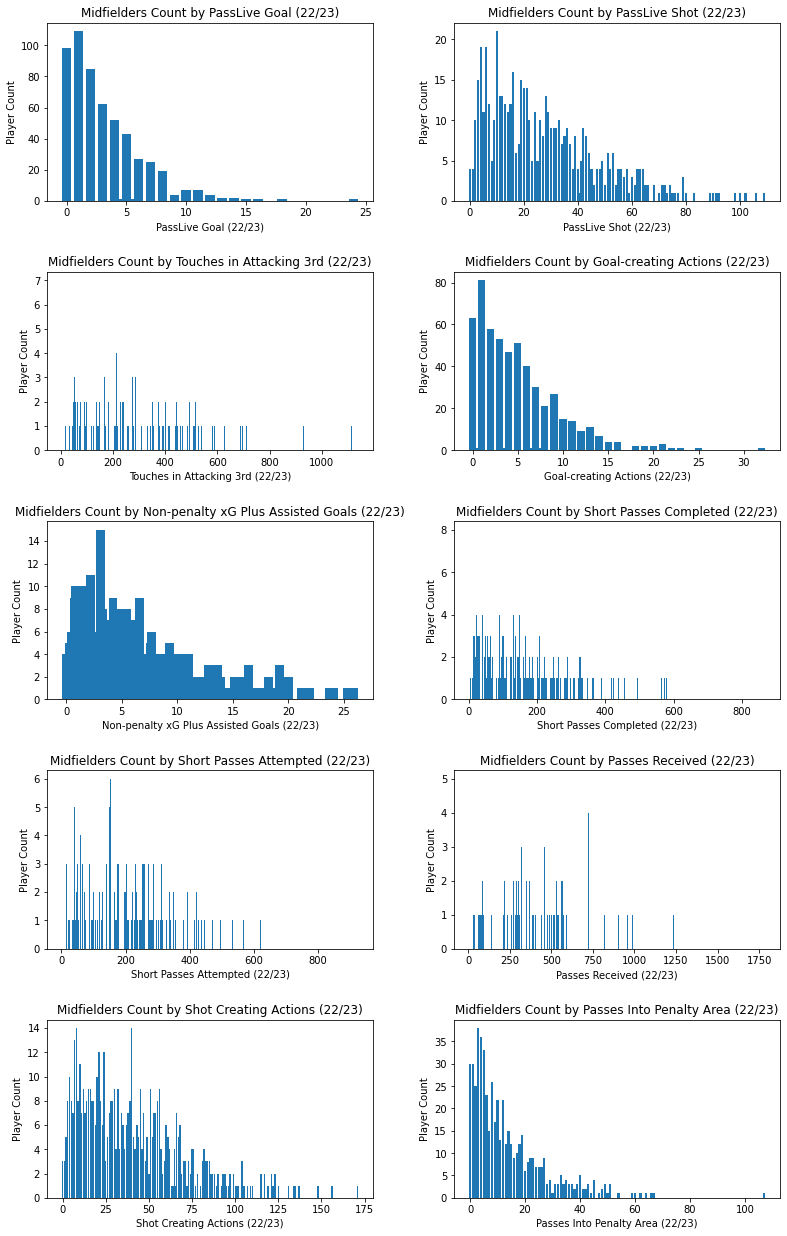

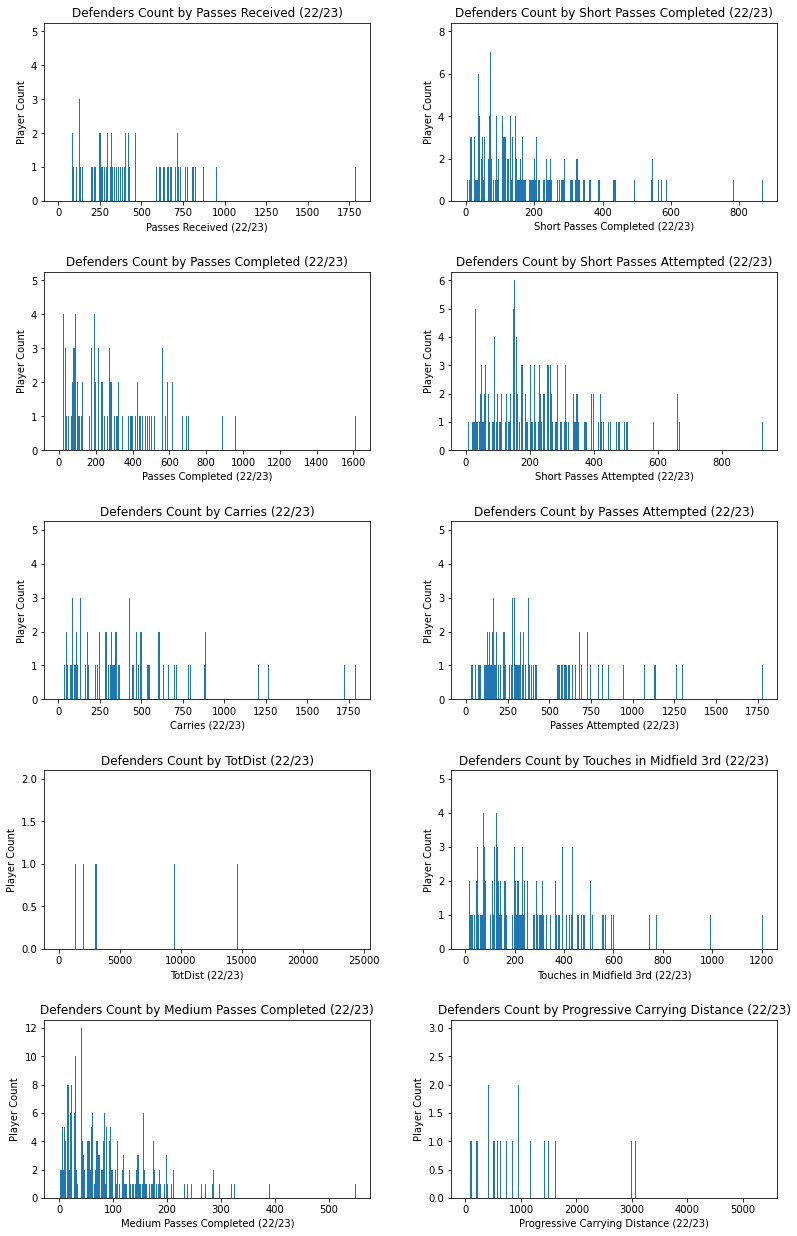

In [81]:
top_10_predictors_attackers_cols = top_10_predictors_attackers.index.tolist()
top_10_predictors_midfielders_cols = top_10_predictors_midfielders.index.tolist()
top_10_predictors_defenders_cols = top_10_predictors_defenders.index.tolist()

plot_predictors(top_10_predictors_attackers_cols, 'Attackers')
plot_predictors(top_10_predictors_midfielders_cols, 'Midfielders')
plot_predictors(top_10_predictors_defenders_cols, 'Defenders')